In [ ]:
#I uploaded my data on drive so I needed to connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# I've trained my model on (256, 256) images
img_width = 256
img_height = 256
batch_size = 32

train_data_dir = "drive/MyDrive/NeironAI/data"

In [ ]:
#ImageDataGenerator generates batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

#I've created training dataset
training_dataset = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

#I've created validation dataset
validation_dataset = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 6040 images belonging to 4 classes.
Found 2585 images belonging to 4 classes.


In [ ]:
# I used transfer learning. I have pretrained Xception model without top layer and I added four layers - pooling, dence, droupout and dense again.
# I've tried several different architectures with different pretrained models and different layers but this one had the best result

def create_model():
  pretrained_model = tf.keras.applications.Xception(input_shape=[256, 256, 3], include_top=False)
  pretrained_model.trainable = True
  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 120)               245880    
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 484       
                                                                 
Total params: 21,107,844
Trainable params: 21,053,316
Non-trainable params: 54,528
_______________________________________

In [ ]:
# I've created callbacks, compiled model with SGD optimizer, categorical crossentropy loss and accuracy metric and than I started training
# My accuracy is around 90%, you can see below how accuracy and loss changes over epochs 

from keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(optimizer=tf.keras.optimizers.SGD(0.02),loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint("NeironAI.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit(training_dataset,
                 validation_data = validation_dataset,
                 steps_per_epoch = 100,
                 epochs = 7,
                 callbacks=[checkpoint,early])

Epoch 1/7
100/100 [==============================] - ETA: 0s - loss: 0.9022 - accuracy: 0.6662
Epoch 00001: val_accuracy improved from -inf to 0.86422, saving model to NeironAI.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


100/100 [==============================] - 1780s 18s/step - loss: 0.9022 - accuracy: 0.6662 - val_loss: 0.4121 - val_accuracy: 0.8642
Epoch 2/7
100/100 [==============================] - ETA: 0s - loss: 0.4549 - accuracy: 0.8484
Epoch 00002: val_accuracy improved from 0.86422 to 0.88395, saving model to NeironAI.h5
100/100 [==============================] - 523s 5s/step - loss: 0.4549 - accuracy: 0.8484 - val_loss: 0.3245 - val_accuracy: 0.8839
Epoch 3/7
100/100 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8722
Epoch 00003: val_accuracy improved from 0.88395 to 0.88588, saving model to NeironAI.h5
100/100 [==============================] - 319s 3s/step - loss: 0.3635 - accuracy: 0.8722 - val_loss: 0.3120 - val_accuracy: 0.8859
Epoch 4/7
100/100 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.8944
Epoch 00004: val_accuracy improved from 0.88588 to 0.89555, saving model to NeironAI.h5
100/100 [==============================] - 242s 2s/st

In [ ]:
model.save('NeironAI.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

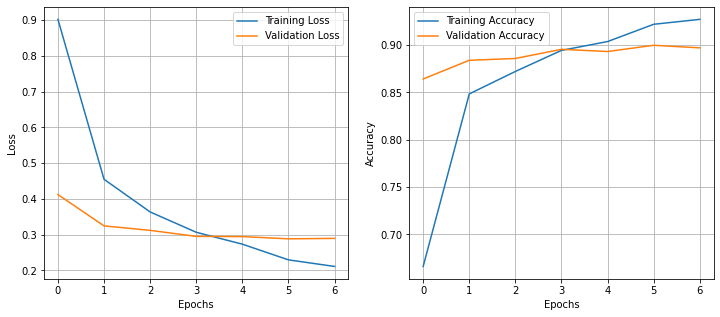

In [ ]:
plt.figure(1, figsize = (12, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss, label = "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('NeironAI.h5')

In [ ]:
#This method is used for loading images, I've uploaded several images on google drive for visualization

def load_image(img_path, show=True):
    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0)      
    img_tensor /= 255.   
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor

In [ ]:
from tensorflow import keras
import numpy as np 
from keras.preprocessing import image
import matplotlib.pyplot as plt

#This method gets image path and model and returns prediction
def teachable_machine_classification(img, model):
    data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
    image = load_image(img, True)
    prediction = model.predict(image)
    print(prediction)
    return np.argmax(prediction) 

In [ ]:
label_to_ids = {0:"camera", 1:"laptop", 2:"mobile", 3:"tv"}

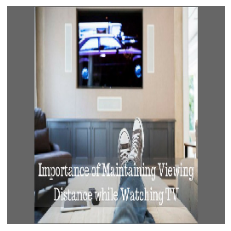

[[2.9436947e-04 3.5496498e-03 4.5594841e-04 9.9570012e-01]]
tv


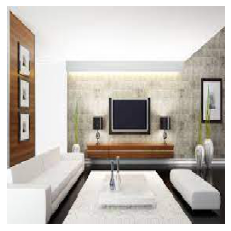

[[0.00242269 0.00336942 0.00250581 0.99170214]]
tv


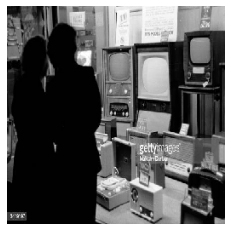

[[0.01671194 0.01068758 0.02586268 0.94673777]]
tv


In [ ]:
for i in range(1, 4):
    img_path = (str)(i) + ".jpg"
    res = teachable_machine_classification(img_path, model)
    print(label_to_ids[res])

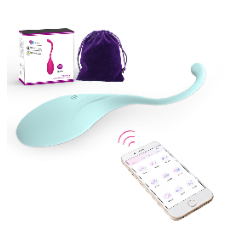

[[3.6373090e-03 3.8294550e-03 9.9212825e-01 4.0490771e-04]]
mobile


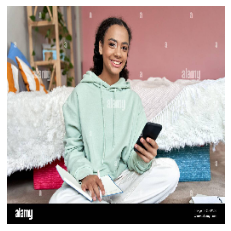

[[8.3591593e-03 3.5892375e-04 9.9116778e-01 1.1414843e-04]]
mobile


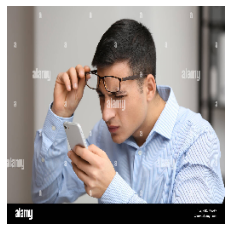

[[0.01206442 0.00303454 0.9833884  0.00151263]]
mobile


In [ ]:
for i in range(1, 4):
    img_path = (str)(i) + ".jpg"
    res = teachable_machine_classification(img_path, model)
    print(label_to_ids[res])

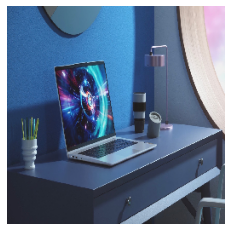

[[0.01122819 0.81304455 0.08470379 0.09102354]]
laptop


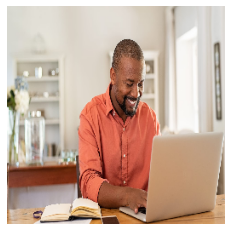

[[4.1124219e-04 9.9455643e-01 2.2948408e-03 2.7374190e-03]]
laptop


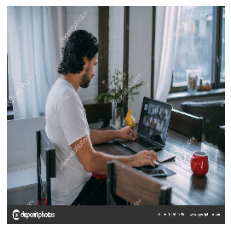

[[0.00219058 0.9802382  0.00775494 0.00981629]]
laptop


In [ ]:
for i in range(1, 4):
    img_path = (str)(i) + ".jpg"
    res = teachable_machine_classification(img_path, model)
    print(label_to_ids[res])

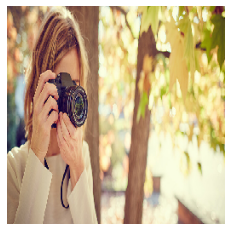

[[9.9558014e-01 8.8949100e-04 3.2199982e-03 3.1038394e-04]]
camera


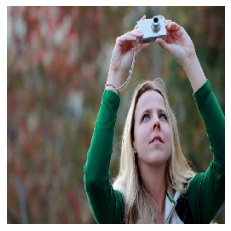

[[0.9652723  0.00347299 0.02298363 0.00827103]]
camera


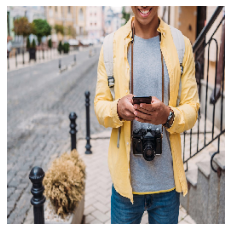

[[0.9921748  0.00123105 0.00557114 0.00102302]]
camera


In [ ]:
for i in range(1, 4):
    img_path = (str)(i) + ".jpg"
    res = teachable_machine_classification(img_path, model)
    print(label_to_ids[res])

In [ ]:
import tensorflow
model = tensorflow.keras.models.load_model('NeironAI.h5')